# Ten charts
*Inspiration from https://towardsdatascience.com/data-visualization-101-how-to-choose-a-chart-type-9b8830e558d6*

In [28]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

In [20]:
#We are using the Titanic data to create example charts.
df = pd.read_excel('Titanic.xls')
#Quick cleaning
df = df.drop(['cabin','boat', 'body'], axis=1)
mean_age = df.age.mean()
df['age'] = df['age'].fillna(mean_age)
emb_mode = df.embarked.mode()
df['embarked'] = df['embarked'].fillna(emb_mode).iloc[0]
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


## 1. Bar chart
- Usefull for showing difference in data, no matter how small.
- The proportions in a bar chart, is very intuitive for a human to read, compared to a pie chart.

<AxesSubplot:xlabel='sex'>

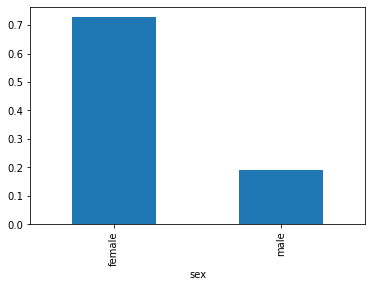

In [21]:
df.groupby('sex')['survived'].mean().plot(kind='bar')

## 2. Pie chart
- Good for showing relative proportions (if there is a big difference in data)
- *In example:* it is clear that pclass 1 was more likely to survive.

<AxesSubplot:ylabel='survived'>

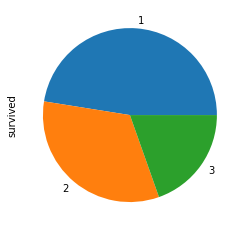

In [23]:
df.groupby('pclass')['survived'].mean().plot(kind='pie')

## 3. Line chart
- Good for showing continueous data over time.
- *Example:* Looking at the stock market.

<AxesSubplot:xlabel='pclass'>

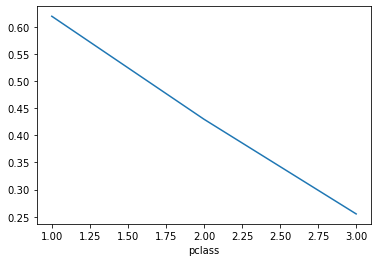

In [24]:
df.groupby('pclass')['survived'].mean().plot(kind='line')

## 4. Scatter plot
- Good for noticing clusters and correlations of data.

<AxesSubplot:xlabel='fare', ylabel='age'>

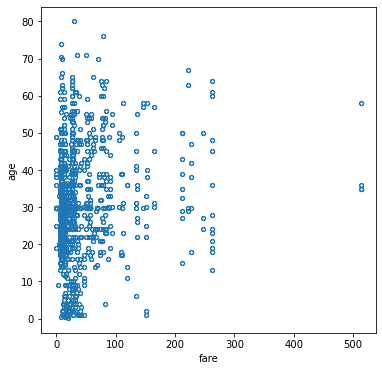

In [26]:
df.plot.scatter(x='fare', y='age', figsize=(6, 6), marker = '$\u25EF$')

## 5. Area chart
- Used when comparing the volume of different data.

<AxesSubplot:>

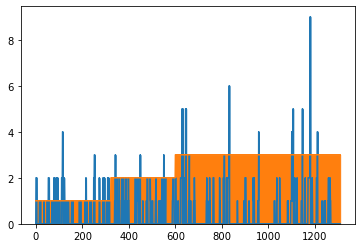

In [41]:
df.parch.plot.area()
df.pclass.plot.area()

## 6. Joint chart
- Good for showing values with different ranges.

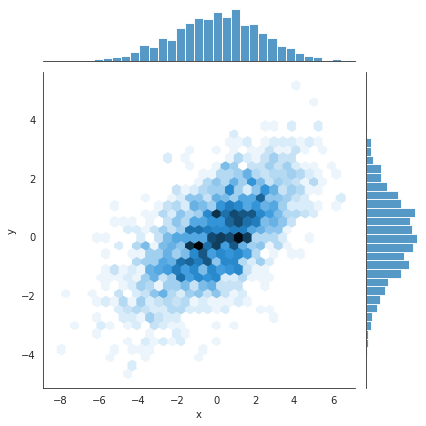

In [76]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind="hex");

## 7. Violin chart
- Good for showing values with small sizes.

C:\Users\sebas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='embarked', ylabel='age'>

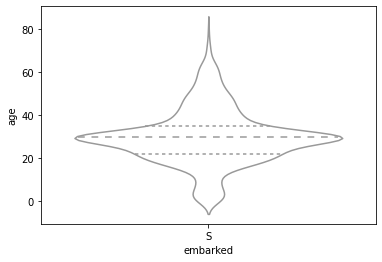

In [31]:
sns.violinplot(df.embarked, df.age, inner="quartile", color="white")

## 8. Contour plot
- Good for showing the density of two variables.

C:\Users\sebas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='sibsp'>

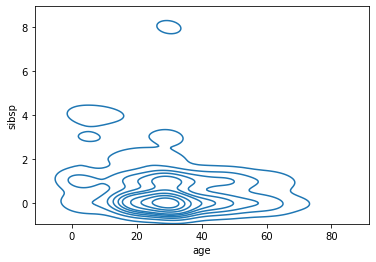

In [29]:
sns.kdeplot(df.age, df.sibsp)

## 9. Boxplot
- Usefull for finding outliers in the data.

<AxesSubplot:>

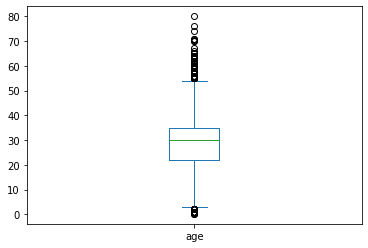

In [32]:
df.age.plot.box()

## 10. Densityplot
- As the name suggests, good for finding the density of a value in the data.

<AxesSubplot:ylabel='Density'>

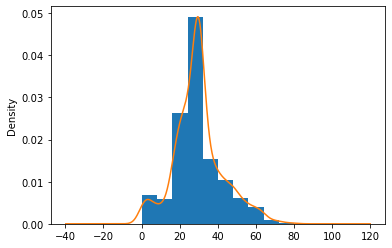

In [6]:
df.age.plot.hist(density=True)
df.age.plot.density()